<a href="https://colab.research.google.com/github/mpisarenco/hello-world/blob/master/VarIntGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement
Let $X(t)$ be a Gaussian process $X(t) \sim N(\mu(t),\sigma(t))$. We define the integral:
$$ I = \int_0^L X(t) dt $$
**Question:** What is the mean and variance of $I$?

# Solution
The mean of $I$ is given by
$$ E(I)=E\int_0^L X(t) dt = \int_0^L EX(t) dt = \int_0^L \mu(t) dt $$
The variance of $I$ is given by
$$ V(I) = E(I^2)-E(I)^2  $$
where
\begin{align}
E(I^2)&=E\left(\int_0^LX(t)dt\int_0^LX(u)du\right) \\
&= E \int_0^L \int_0^L X(t)X(u)du dt \\
&= \int_0^L \int_0^L E[X(t)X(u)]du dt \\
&= \int_0^L \int_0^L [\operatorname{Cov}(X(t),X(u))+EX(t)EX(u)] du dt \\
&= \int_0^L \int_0^L \sigma(t) \sigma(u) \rho(t-u) dudt + \int_0^L \int_0^L \mu(t) \mu(u) dudt \\
&= \int_0^L \int_0^L \sigma(t) \sigma(u) \rho(t-u) dudt + \left(\int_0^L \mu(t) dt \right)^2.
\end{align}
It follows that
$$ V(I) = \int_0^L \int_0^L \sigma(t) \sigma(u) \rho(t-u) dudt $$



# Uncorrelated stochastic processes
If we choose the correlation function $\rho(t-u)=\delta(t-u)$ then
$$ V(I) = \int_0^L \sigma(t) \int_0^L \sigma(u) \delta(t-u) dudt 
= \int_0^L \sigma(t)^2 dt $$

# Example 1

Let $\sigma(t) = \sin(t)$ and $L=\pi$ (note that $\sin(t)\ge 0$ for $t \in [0,\pi]$> Then 
$$V(I) = \int_0^\pi \sin(t)^2 dt
 = \int_0^\pi \frac{1}{2} - \frac{1}{2} \cos(2t) dt 
 = \left. \left( \frac{t}{2} - \frac{1}{4} \sin(2t) \right) \right|_0^\pi
 = \frac{\pi}{2} - \frac{1}{4} \sin(2\pi) = \frac{\pi}{2} \approx 1.5708$$

(check result here: https://www.wolframalpha.com/input/?i=int_0%5Epi+sin%28t%29%5E2+dt)

 Let us now verify the analytical result with a Monte-Carlo simulation. We approximate the integral by a sum
 $$ I = \int_0^L X(t) \, dt \approx \sum_{i=1}^N X(i\Delta)\,\Delta $$
Now each $X(i\Delta)$ represents a random variable $X(i\Delta) \sim N(\mu(i\Delta), \sigma(i\Delta)^2/\Delta )$. Note that in order to obtain the variance for the discretized approximation we need to divide the original variance by the discretization length (see https://math.stackexchange.com/questions/1892930/approximating-the-variance-of-the-integral-of-a-white-noise-gaussian-process).


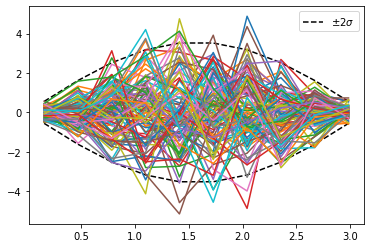

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

nPoints = 10
nSamples = 100
L = np.pi

delta = L/nPoints
#t = np.linspace(0,L,nPoints)
t = np.linspace(0+delta/2,L-delta/2,nPoints)
sigma = np.sin(t)
sigmad = sigma/np.sqrt(delta) # see https://math.stackexchange.com/questions/1892930/approximating-the-variance-of-the-integral-of-a-white-noise-gaussian-process

# Draw samples from the prior
mean = 0*t
cov = np.diag(sigmad**2)
samples = np.random.multivariate_normal(mean, cov, nSamples)
samples = samples.transpose()
plt.plot(t, 2*sigmad, 'k--', t, -2*sigmad, 'k--', t,samples);
plt.legend({'$\pm 2\sigma$'});

1.6257050407292746


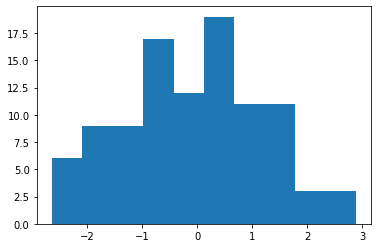

In [ ]:
# Calculate integral via discrete sum
Id = delta*np.sum(samples, axis=0)
plt.hist(Id)
varId = np.std(Id)**2
print(varId)

Pretty close. To get closer, let us define a function parametrized by the number of points and number of samples.

In [ ]:
import numpy as np

def MonteCarlo(nPoints, nSamples):
  L = np.pi

  delta = L/nPoints
  #t = np.linspace(0,L,nPoints)
  t = np.linspace(0+delta/2,L-delta/2,nPoints)
  sigma = np.sin(t)
  sigmad = sigma/np.sqrt(delta) # see https://math.stackexchange.com/questions/1892930/approximating-the-variance-of-the-integral-of-a-white-noise-gaussian-process

  # Draw samples from the prior
  mean = 0*t
  cov = np.diag(sigmad**2)
  samples = np.random.multivariate_normal(mean, cov, nSamples)
  samples = samples.transpose()

  # Calculate integral via discrete sum
  Id = delta*np.sum(samples, axis=0)
  varId = np.std(Id)**2
  return varId

And use this function with increasing arguments.

In [ ]:
print(MonteCarlo(10,10), MonteCarlo(100,100), MonteCarlo(1000,1000))

0.4250118882392655 1.7185139946484866 1.5582126942350996


In [ ]:
print(MonteCarlo(100,100), MonteCarlo(100,1000), MonteCarlo(100,10000), MonteCarlo(100,100000))

1.4759326031770232 1.4801683490561854 1.5793468071230288 1.5756948607010246


The results seem to suggest that the variances converges to $\pi/2$!
(Try running the above two cells multiple times.)

# Sources:

https://math.stackexchange.com/questions/1892930/approximating-the-variance-of-the-integral-of-a-white-noise-gaussian-process

https://stats.stackexchange.com/questions/229877/max-and-min-variance-of-the-integral-of-a-stationary-stochastic-process/229896

https://stats.stackexchange.com/questions/226657/variance-of-the-integral-of-a-stochastic-process

https://math.stackexchange.com/questions/1471507/integral-of-a-gaussian-process

